<a href="https://colab.research.google.com/github/awaris123/OnlineSocialNetworkAnalysis/blob/master/OSNA_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install PyGithub

     |████████████████████████████████| 276kB 3.4MB/s 


In [4]:
#requirements
from github import Github
import pickle
import cloudpickle as cp
from urllib.request import urlopen
import itertools
import networkx as nx
import matplotlib.pyplot as plt

g = Github("a8b3e6cf72a24f9bb9bcb845423ed1249d4223eb")

# Step 1: Mine users and followers from Github


In [ ]:
def get_candidates():
    names = ["smn", "kevinclark", "kunstreich", "automatthew"]
    candidates = []
    for name in names:
        gAccount = g.get_user(name)
        candidates.append(gAccount)
    return candidates
    


In [ ]:
def crawl_candidates(candidates, depth=1):
    social_graph = {}
    
    candidates = set(candidates)
    for _ in range(depth):
        next_cand = set()
        for dude in candidates:
            d_id = dude.id
            if d_id not in social_graph:
                try:
                    social_graph[d_id] = list(dude.get_followers()[:5])
                except IndexError as e:
                    social_graph[d_id] = list(dude.get_followers())
                next_cand.update(social_graph[d_id])
        candidates = next_cand
            
    return social_graph
        
    
candidates = get_candidates()
network = crawl_candidates(candidates,depth=3)


In [ ]:
for k, v in network.items():
    print(k, len(v))

20, 1065, 105, 464

In [ ]:
sum([len(v) for v in network.values()])

In [ ]:
pickle.dump(network, open("network.pkl", "wb"))

# Step 2 and 3: Visualize Github follower network and plot network measures

In [5]:
#https://stackoverflow.com/questions/50624042/how-to-unpickle-a-file-that-has-been-hosted-in-a-web-url-in-python

loaded_pickle_object = cp.load(urlopen("https://github.com/awaris123/OnlineSocialNetworkAnalysis/blob/master/network.pkl?raw=true"))

In [6]:
# turn into edge list
edge_list=[[(k, dude.id) for dude in v] for k,v in loaded_pickle_object.items()]
#https://stackoverflow.com/a/953097
edge_list = list(itertools.chain(*edge_list))

In [7]:
total_nodes = set()
for k,v in edge_list:
  total_nodes.update([k,v])
len(total_nodes)

363

In [8]:
!pip install networkx

In [9]:
G = nx.DiGraph()
G_undirected = nx.Graph()
G.add_edges_from(edge_list)
G_undirected.add_edges_from(edge_list)

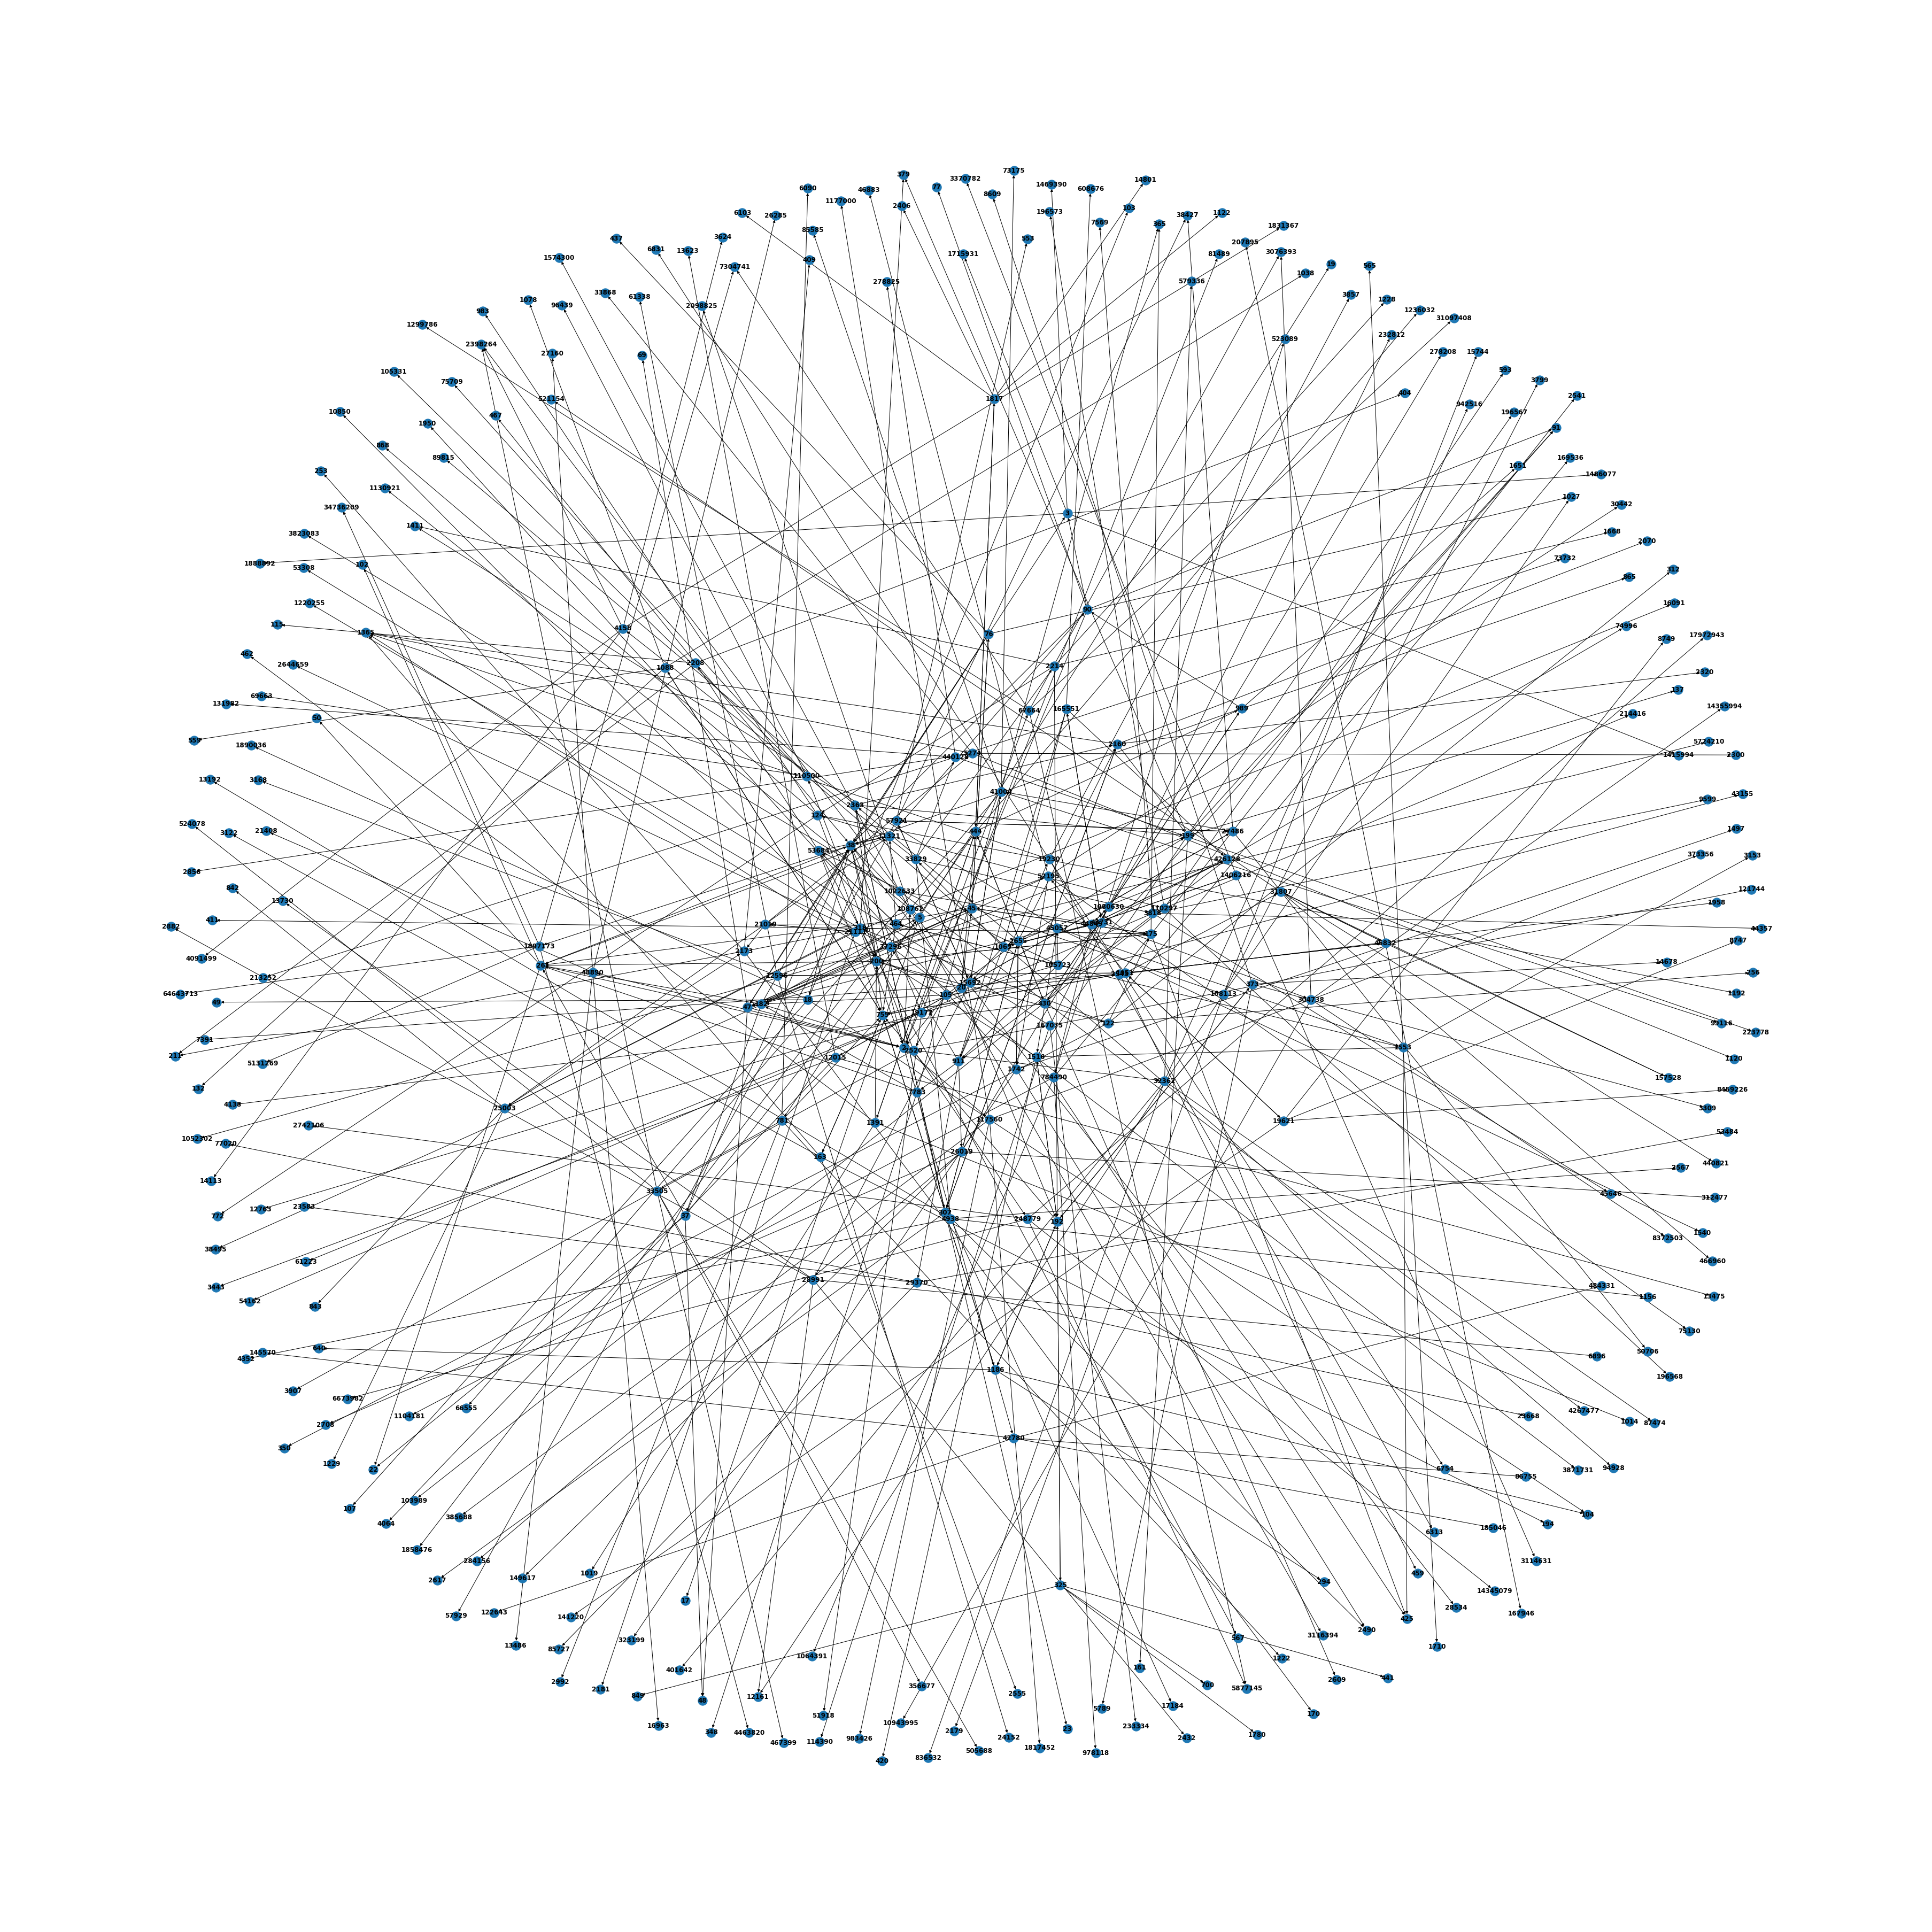

In [10]:
plt.figure(figsize=(50,50))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()


In [21]:
def deg_distr(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    deg_count = {}
    for n, d in G.degree():
      deg_count[d]= deg_count.get(d, 0) + 1

    plt.figure(figsize=(15,10))

    plt.bar(deg_count.keys(), deg_count.values(), width=0.80, color="b")

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")

    plt.show()


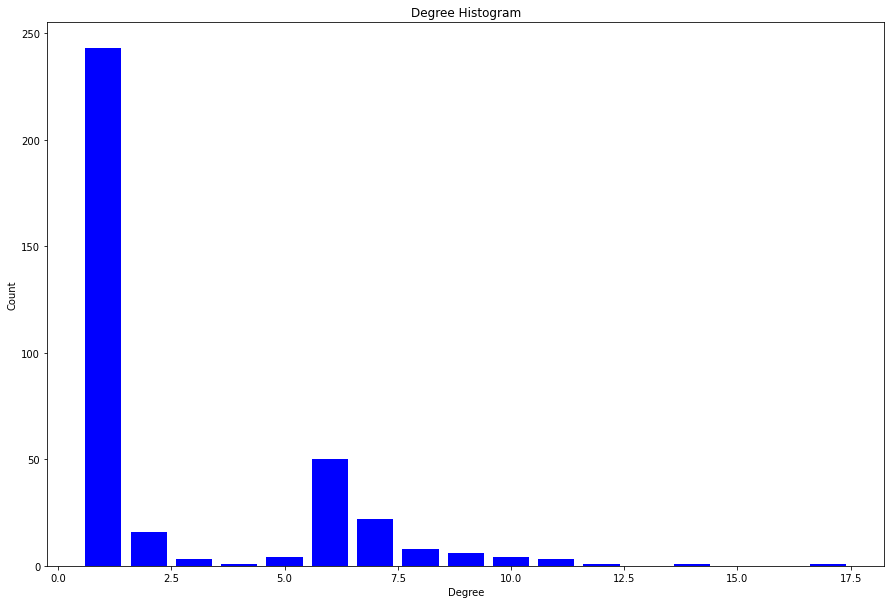

In [22]:
deg_distr(G)

In [23]:
def plot_centrality(func, G):
    node_centralities = func(G)
    degreeCount = {}
    for key, item in node_centralities.items():
        degreeCount[item] = degreeCount.get(item, 0)+1
    
    plt.figure(figsize=(15,15))
    nx.draw(G,cmap=plt.get_cmap("YlOrRd"), node_color=list(node_centralities.values()),with_labels=True, font_weight='bold', node_size=60, font_size=6)



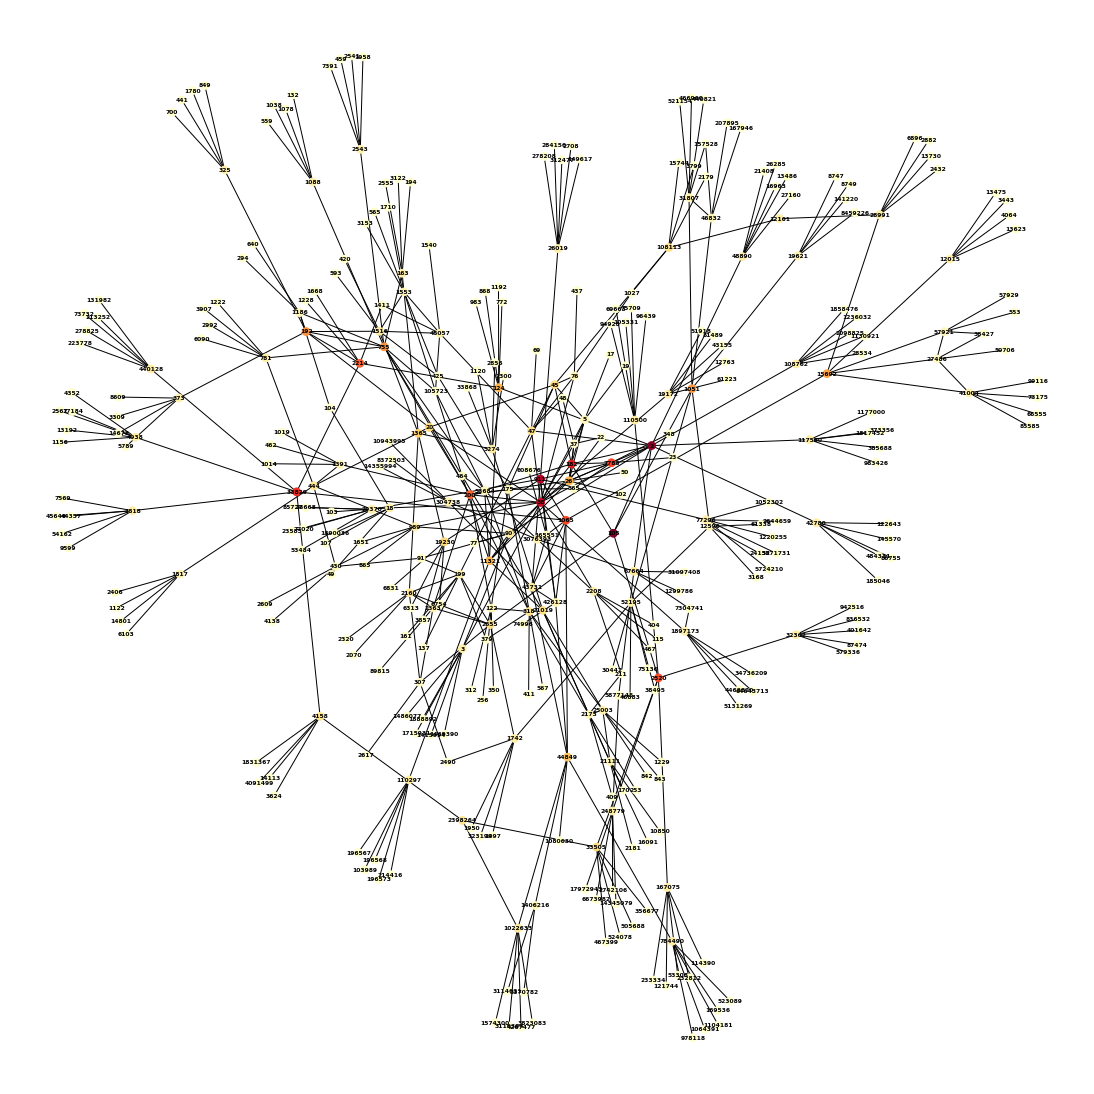

In [24]:
plot_centrality(nx.betweenness_centrality, G_undirected)

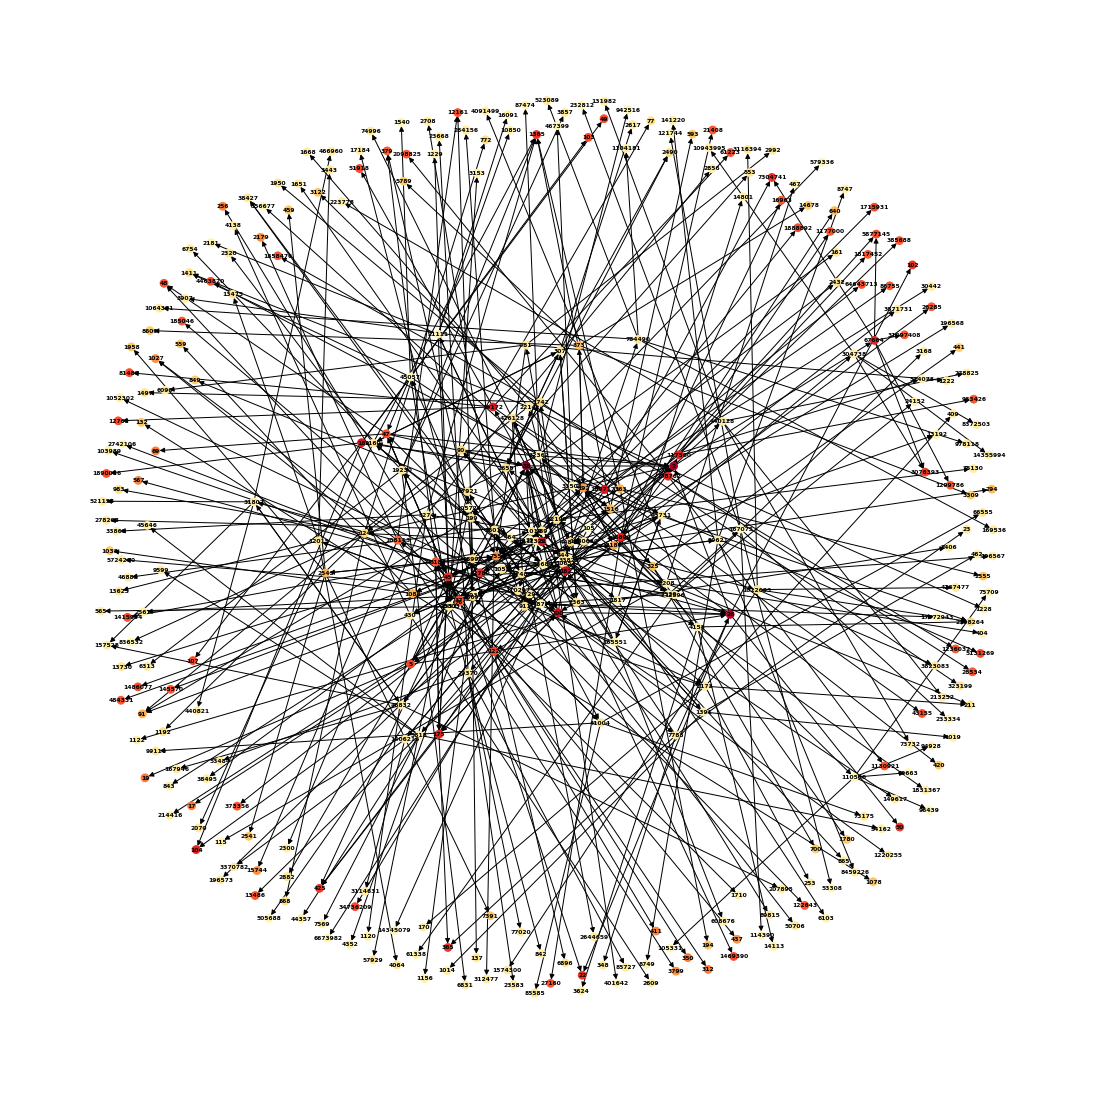

In [25]:
plot_centrality(nx.closeness_centrality, G)